In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Kaggle dataset from https://www.kaggle.com/venky73/spam-mails-dataset
data = pd.read_csv("./spam_ham_dataset.csv.zip")
data.tail(8)

,Unnamed: 0,label,text,label_num
5163,1428,ham,Subject: re : meter # : 1266 ; august 2000 / a...,0
5164,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [2]:
#Remove duplicated rows
data.drop_duplicates(subset="text", keep="first", inplace= True)
data.reset_index(drop=True, inplace=True)
data.tail(8)

,Unnamed: 0,label,text,label_num
4985,4162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1
4986,1428,ham,Subject: re : meter # : 1266 ; august 2000 / a...,0
4987,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1
4988,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
4989,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
4990,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
4991,1409,ham,Subject: industrial worksheets for august 2000...,0
4992,4807,spam,Subject: important online banking alert\r\ndea...,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4993 entries, 0 to 4992
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4993 non-null   int64 
 1   label       4993 non-null   object
 2   text        4993 non-null   object
 3   label_num   4993 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.2+ KB


# ===== Data Cleaning =====

In [4]:
#Remove the "Subject: " in text column and change the column name
spam = data.copy()
spam = spam[["text","label_num"]]
spam["text"]=spam["text"].str.lower()
spam["text"]=spam["text"].str[9:].str.strip()
spam = spam.rename(columns={"label_num":"is_spam"})
spam.head(10)

,text,is_spam
0,enron methanol ; meter # : 988291\r\nthis is a...,0
1,"hpl nom for january 9 , 2001\r\n( see attached...",0
2,"neon retreat\r\nho ho ho , we ' re around to t...",0
3,"photoshop , windows , office . cheap . main tr...",1
4,re : indian springs\r\nthis deal is to book th...,0
5,ehronline web address change\r\nthis message i...,0
6,spring savings certificate - take 30 % off\r\n...,0
7,looking for medication ? we ` re the best sour...,1
8,noms / actual flow for 2 / 26\r\nwe agree\r\n-...,0
9,"nominations for oct . 21 - 23 , 2000\r\n( see ...",0


In [5]:
#Use regex to extract text without linebreak
#spam["text"] = spam["text"].str.findall("[^\r\n]*").apply("".join)

In [36]:
#There is a linebreak \r\n. Replace this with space

#,"",regex = True, inplace = True

pd.set_option("display.max_colwidth",None)

spam["text"] = spam["text"].str.replace(r"\t+|\n+|\r+"," ", regex=True)
spam["text"] = spam["text"].str.replace("nbsp"," ")
spam["text"] = spam["text"].str.strip()
spam.head(10)

,text,is_spam
0,"enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes .",0
1,"hpl nom for january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls",0
2,"neon retreat ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time ! i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute . on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about . i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer . the first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past . the second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide . email me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! ) have a great weekend , great golf , great fishing , great shopping , or whatever makes you happy ! bobby",0
3,"photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin",1
4,"re : indian springs this deal is to book the teco pvr revenue . it is my understanding that teco just sends us a check , i haven ' t received an answer as to whether there is a predermined price associated with this deal or if teco just lets us know what we are giving . i can continue to chase this deal down if you need .",0
5,"ehronline web address change this message is intended for ehronline users only . due to a recent change to ehronline , the url ( aka "" web address "" ) for accessing ehronline needs to be changed on your computer . the change involves adding the letter "" s "" to the "" http "" reference in the url . the url for accessing e

# ===== EDA =====

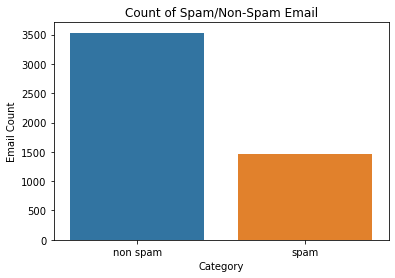

In [7]:
barplt = spam.groupby(["is_spam"])["is_spam"].count().reset_index(name="count")
barplt["is_spam"] = barplt["is_spam"].map({0:"non spam",1:"spam"})
sns.barplot(data=barplt, x="is_spam", y="count")

plt.title("Count of Spam/Non-Spam Email")
plt.xlabel("Category")
plt.ylabel("Email Count")
plt.show()

In [8]:
#Email word count
txt_len = spam.copy()
txt_len["length"] = txt_len["text"].str.split().apply(len)

print("\033[1m"+ "Non Spam:" + "\033[0m")
print(txt_len[txt_len["is_spam"]==0]["length"].describe())
print("\n")

print("\033[1m"+ "Spam:" + "\033[0m")
print(txt_len[txt_len["is_spam"]==1]["length"].describe())

Non Spam:
count    3531.000000
mean      228.490513
std       336.977823
min         1.000000
25%        51.000000
50%       126.000000
75%       296.500000
max      8861.000000
Name: length, dtype: float64


Spam:
count    1462.000000
mean      237.688782
std       347.030824
min         0.000000
25%        57.000000
50%       117.000000
75%       249.750000
max      3933.000000
Name: length, dtype: float64


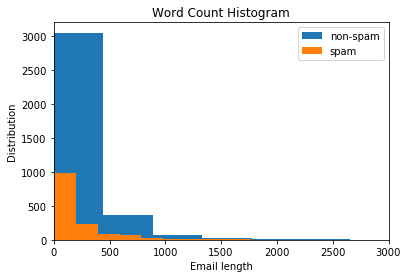

In [9]:
plt.hist(txt_len[txt_len["is_spam"]==0]["length"],label="non-spam", bins = 20)
plt.hist(txt_len[txt_len["is_spam"]==1]["length"],label="spam", bins = 20)
plt.xlim([0,3000])
plt.legend(loc="upper right")

plt.xlabel("Email length")
plt.ylabel("Distribution")
plt.title("Word Count Histogram")

plt.show()

In [10]:
txt_len["length"].describe()

count    4993.000000
mean      231.183857
std       339.943107
min         0.000000
25%        52.000000
50%       123.000000
75%       286.000000
max      8861.000000
Name: length, dtype: float64

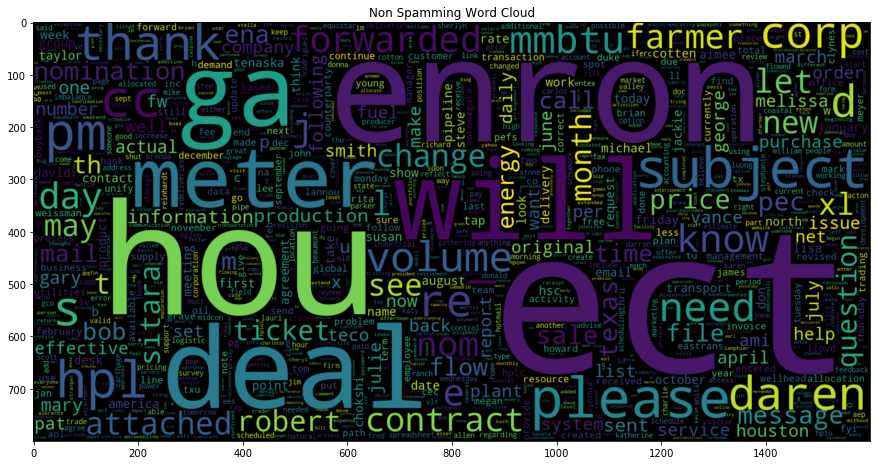

In [11]:
from wordcloud import WordCloud
#Not spamming keyword
plt.figure(figsize=(15,15))

wc = WordCloud(
    collocations= False,
    max_words= 1000, 
    width=1600, 
    height=800
).generate(" ".join(spam[spam["is_spam"]==0]["text"]))

plt.imshow(wc,interpolation="bilinear")
plt.title("Non Spamming Word Cloud")
plt.show()

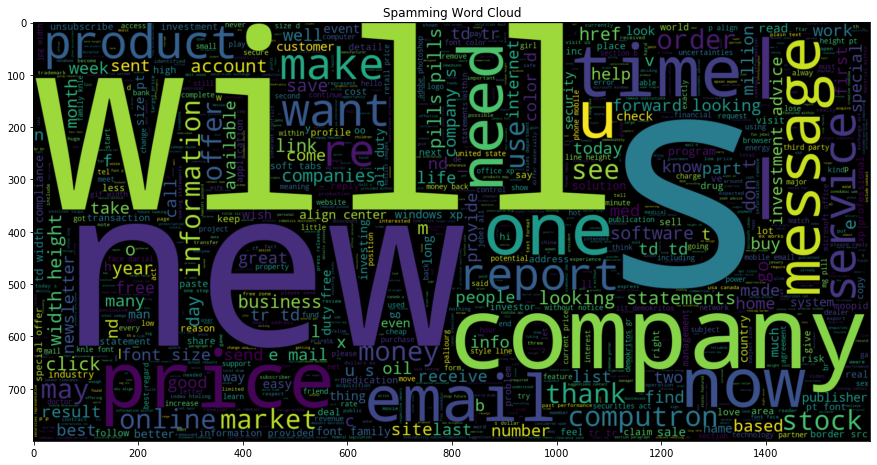

In [12]:
#spamming keyword
plt.figure(figsize=(15,15))

wc = WordCloud(
    collocations= True,
    max_words= 1000,
    width=1600, 
    height=800
).generate(" ".join(spam[spam["is_spam"]==1]["text"]))

plt.imshow(wc,interpolation="bilinear")
plt.title("Spamming Word Cloud")
plt.show()

# ===== Data Prepration for ML =====

# Use CountVectorizer to split the most frequent words to feature columns

In [13]:
#assign target
y= spam["is_spam"]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

#create vectorizer for only 1 word (ngram)
#use the most 1000 frequest word
vectorizer = CountVectorizer(
    max_features=1000,
    stop_words="english",
    ngram_range=(1,1),
    binary=True
)
vectorizer.fit(spam["text"])
X= pd.DataFrame(
    data=vectorizer.transform(spam["text"]).todense(), 
    columns = vectorizer.get_feature_names()
)
X.head(8)

,00,000,01,02,03,04,05,06,07,08,...,xls,xp,yahoo,year,years,yes,yesterday,young,zero,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=30, stratify =y)

# ===== Random Forest ML =====

# Setup Hyperparameter Tuning for RF

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn import metrics

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features= ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(10,100, num=10)]
min_samples_split=[2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [17]:
rf = RandomForestClassifier()
rf_grid = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = param_grid,
    n_iter=30,
    cv=3, 
    verbose=0, 
    random_state =30
)
rf_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=30)

In [18]:
rf_grid.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

# Predict and Evaluate RF's result

In [19]:
rf_predicted= rf_grid.predict(X_test)
print ("Accuracy Score: {:.4f}".format(metrics.accuracy_score(y_test,rf_predicted)))
print("Recall Score: {:.4f}".format(metrics.recall_score(y_test,rf_predicted)))

Accuracy Score: 0.9800
Recall Score: 0.9754


In [20]:
print(metrics.confusion_matrix(y_test,rf_predicted))

[[867  16]
 [  9 357]]


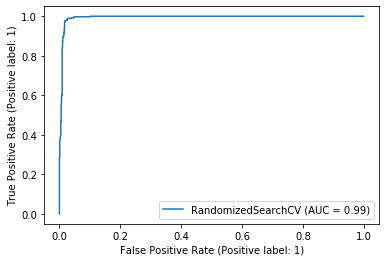

In [21]:
metrics.plot_roc_curve(rf_grid,X_test, y_test)

# Feature Importances of RF ML

In [22]:
importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_grid.best_estimator_.feature_importances_
})
importances = importances.sort_values("importance", ascending=False)
importances

,feature,importance
328,enron,4.026495e-02
28,2000,3.566686e-02
439,http,3.286751e-02
432,hpl,3.279298e-02
892,thanks,3.229860e-02
...,...,...
971,weissman,2.113660e-08
744,reliantenergy,4.110762e-09
420,hesse,0.000000e+00
741,reinhardt,0.000000e+00


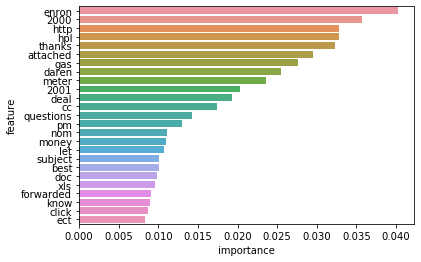

In [23]:
#most 25 important features
sns.barplot(x=importances[:25]["importance"], y=importances[:25]["feature"])

# Spam/Non-Spam Feature Importances by top Keywords

In [24]:
importance_data= X.join(y)
importance_data.head()

,00,000,01,02,03,04,05,06,07,08,...,xp,yahoo,year,years,yes,yesterday,young,zero,zone,is_spam
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#group data by is_spam to get new dataset
top_groupby = importance_data
top_features = importances[:25]["feature"].tolist()

chosen_col = top_features.copy()
chosen_col.append("is_spam")

top_groupby = top_groupby[chosen_col]
top_groupby = top_groupby.groupby(["is_spam"])[top_features].sum().reset_index()
top_groupby

,is_spam,enron,2000,http,hpl,thanks,attached,gas,daren,meter,...,money,let,subject,best,doc,xls,forwarded,know,click,ect
0,0,1427,1471,135,1073,1305,826,1055,993,766,...,48,817,1363,98,107,480,885,953,98,859
1,1,0,40,473,0,81,14,22,0,0,...,185,63,107,226,6,0,1,125,209,3


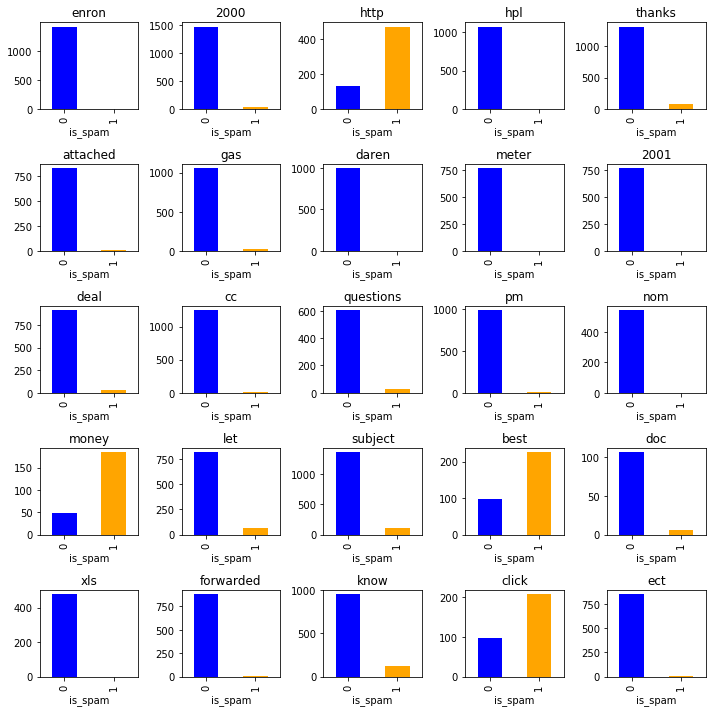

In [26]:
fig = plt.figure(figsize=(10,10))
i=1
for col in top_features:
    ax = fig.add_subplot(5,5,i)
    top_groupby.plot.bar(x="is_spam", y=col, ax=ax, title=col,legend= False, color=["blue","orange"])
    i+=1
plt.tight_layout()
plt.show()

# ===== Naive Bayes Model ML =====

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_predicted = gnb.predict(X_test)
print ("Accuracy Score: {:.4f}".format(metrics.accuracy_score(y_test,gnb_predicted)))
print("Recall Score: {:.4f}".format(metrics.recall_score(y_test,gnb_predicted)))

Accuracy Score: 0.9239
Recall Score: 0.9617


In [28]:
print(metrics.confusion_matrix(y_test,gnb_predicted))

[[802  81]
 [ 14 352]]


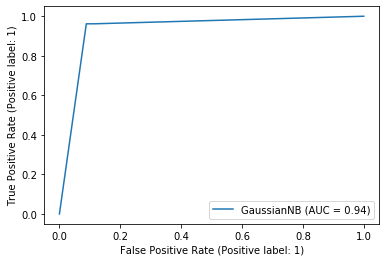

In [29]:
metrics.plot_roc_curve(gnb,X_test, y_test)

# ===== XGBoost ML =====

In [30]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder =False)
model.fit(X_train, y_train)
xgb_predicted = model.predict(X_test)

print ("\nAccuracy Score: {:.4f}".format(metrics.accuracy_score(y_test,xgb_predicted)))
print("Recall Score: {:.4f}".format(metrics.recall_score(y_test,xgb_predicted)))

[21:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy Score: 0.9688
Recall Score: 0.9781


In [31]:
print(metrics.confusion_matrix(y_test,xgb_predicted))

[[852  31]
 [  8 358]]


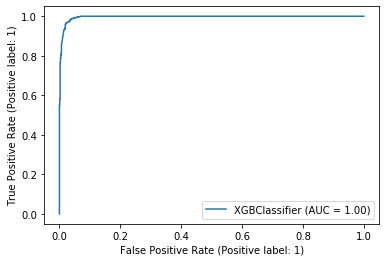

In [32]:
metrics.plot_roc_curve(model,X_test, y_test)

# ===== Productionize RF Model & Sample Testing =====

In [33]:
def spam_detector(txt):
    tdm = vectorizer.transform(np.array([txt]))
    result = np.round(rf_grid.predict_proba(tdm)[:,1],4)
    return result

In [34]:
txt= "This is free money. Come here and sign up http://nomoneynoworries.com"
spam_detector(txt)

array([0.9724])

In [35]:
txt2= "Hi Jimmy, how's it going? I have arranged a meeting for us at 2 pm today. Many thanks"
spam_detector(txt2)

array([0.094])